<a href="https://colab.research.google.com/github/DannMacias/customer-segmentation/blob/main/03_kmeans_clustering_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Customer segmentation (part 3): KMeans clustering 🛒 </b>

From the exploratory data analysis (EDA), I observe that two features that have the most relationship with the amount spent in the store are: Income and Number of children.

In this section, I will use these features to build a KMeans model and perform a first customer segmentation.

# 0. Getting setup

In [14]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# For KMeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Get the data from GitHub repo
data_path = "https://github.com/DannMacias/customer-segmentation/raw/main/clean_customer_analysis_database.csv"
df = pd.read_csv(data_path)
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Total_Spent,Age,Seniority,Partner,Num_Childer,Num_Childen,Num_Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,1617,57,971,Alone,0,0,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,27,60,125,Alone,2,2,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,776,49,472,Partner,0,0,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,53,30,65,Partner,1,1,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,422,33,321,Partner,1,1,1,3,1


Select the features: Income, Number of children and total amount spent.

In [8]:
# Features used in KMeans clustering
features = ["Total_Spent", "Income", "Num_Children"]

# Create a new DataFrame with this features
X = df[features]
X.head()

,Total_Spent,Income,Num_Children
0,1617,58138.0,0
1,27,46344.0,2
2,776,71613.0,0
3,53,26646.0,1
4,422,58293.0,1


Let's transform this features and scale the values.

In [11]:
# Scale the data
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 1.67548812,  0.2340627 , -1.26480327],
       [-0.96235832, -0.23455948,  1.40580564],
       [ 0.28024985,  0.76947764, -1.26480327],
       ...,
       [ 1.05169551,  0.18809052, -1.26480327],
       [ 0.39140438,  0.67538765,  0.07050118],
       [-0.7218    ,  0.02470453,  1.40580564]])

# 1. Clustering with KMeans

## Elbow method

The elbow method is the strategy I'll use to select the best cluster. 

The elbow method will experiment with different numbers of clusters and plot the error from each cluster, looking for a point that forms an elbow on the plot.

As a result, the ideal cluster is the one that produces this elbow.

In [ ]:
# Get a list of errors for Elbow method
errors = []
for k in range(1, 11): # from 0 to 10 clusters to experiment
  model = KMeans(n_clusters = k, random_state = 42)
  model.fit(X_scaled) # fit the model with scaled data
  errors.append(model.inertia_) # inertia = error of the model, low values is better

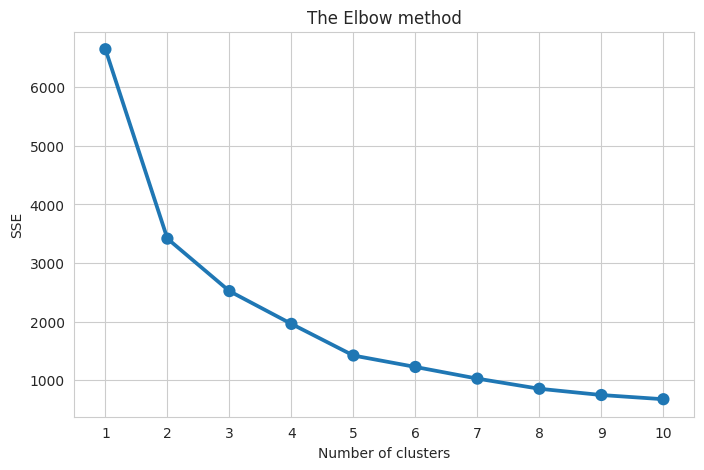

In [25]:
# Plot the results
plt.figure(figsize = (8, 5))
sns.pointplot(x = list(range(1, 11)), y = errors)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.grid(True);


The diagram shows that the cluster that creates the elbow is three. So three clusters is the best values for our model.

Another way to determine the number of optimal clusters is through the use of the knee locator.

In [ ]:
# Try to install kneed from https://github.com/arvkevi/kneed
try:
  from kneed import KneeLocator
except:
  !pip install kneed
  from kneed import KneeLocator

In [21]:
# Use Knee Locator to find the optimal number of clusters
k1 = KneeLocator(x = range(1, 11), # from 0 to 10 clusters
                 y = errors,
                 curve = "convex",
                 direction = "decreasing")

print(f"The optimun number of clusters is: {k1.elbow} clusters")

The optimun number of clusters is: 3 clusters


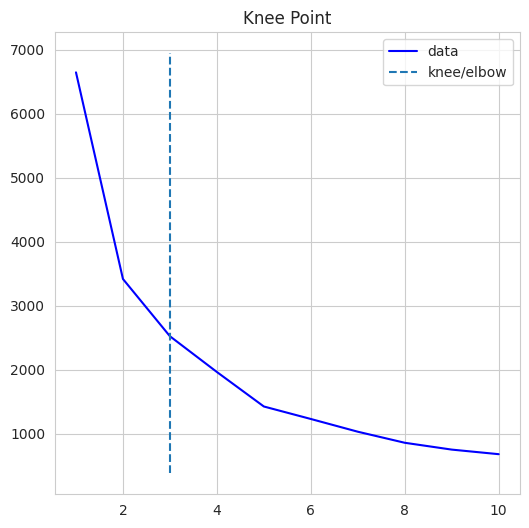

In [24]:
# Plot the curve
k1.plot_knee()

## Clustering with KMeans

In [26]:
# Create KMeans model with 3 clusters
model = KMeans(n_clusters = 3, random_state = 42)

# Fit the model
model.fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [27]:
# Assign the correspond cluster to the data
X = X.assign(ClusterLabel = model.labels_)
X.head()

,Total_Spent,Income,Num_Children,ClusterLabel
0,1617,58138.0,0,1
1,27,46344.0,2,0
2,776,71613.0,0,1
3,53,26646.0,1,2
4,422,58293.0,1,2


# 2. Analysis of the clusters

In [29]:
# Average income, total spent and number of children per cluster
X.groupby("ClusterLabel")[["Total_Spent", "Income", "Num_Children"]].mean()

,Total_Spent,Income,Num_Children
ClusterLabel,,,
0,227.374179,43947.943107,2.109409
1,1293.430189,74506.978616,0.408805
2,221.049793,37824.326763,0.840249


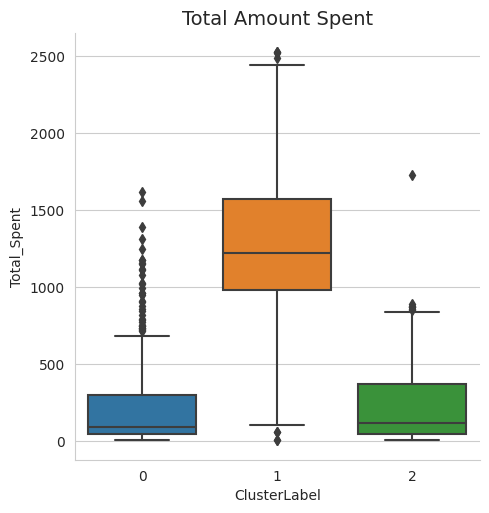

In [53]:
# Compare Total spent in the clusters
sns.catplot(data = X, x = "ClusterLabel", y = "Total_Spent", kind = "box")
plt.title("Total Amount Spent", fontsize = 14);

Customers in Cluster 1 spent more in the store, although this spending is highly variable, with some customers spending less than 100 and others spending more than 2,500.

Cluster 0 customers spent an average of 220 and, like Cluster 1, their spending is highly variable. This is reflected in the number of outliers in the box-and-whisker plot. Customers in Cluster 2 spent slightly more than those in Cluster 0.

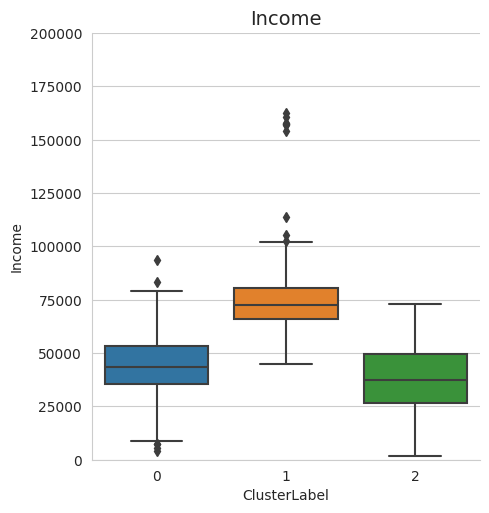

In [51]:
# Compare Income in the clusters
sns.catplot(data = X, x = "ClusterLabel", y = "Income", kind = "box")
plt.title("Income", fontsize = 14)
plt.ylim(0, 200_000);

Cluster 1 is made up of customers with the highest annual income, while the customers in clusters 2 and 3 have a similar annual income.

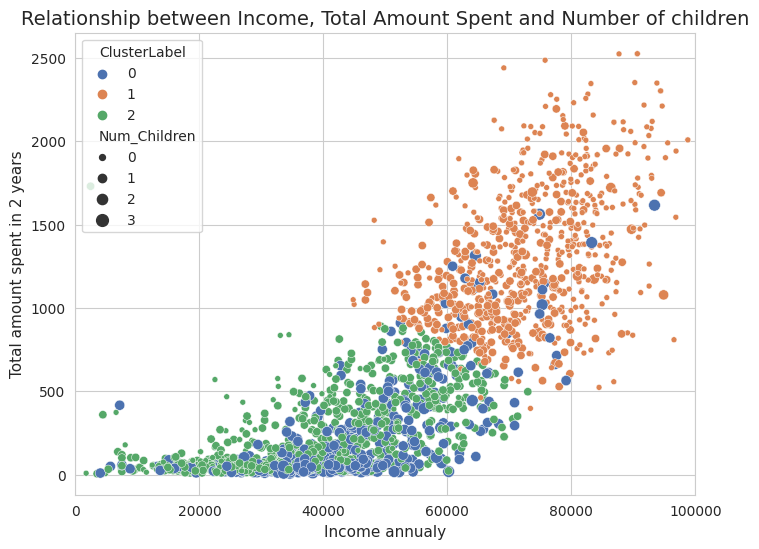

In [44]:
# Plot the relationship between Income, Total spent and clusters
plt.figure(figsize = (8, 6))
sns.scatterplot(data = X, x = "Income", y = "Total_Spent", 
                hue = "ClusterLabel", size = "Num_Children",
                palette = "deep", s = 50)
plt.title("Relationship between Income, Total Amount Spent and Number of children", fontsize = 14)
plt.xlim(0, 100_000)
plt.xlabel("Income annualy", size = 11)
plt.ylabel("Total amount spent in 2 years", size = 11);

# Conclusions

Based on the results of the clustering process, we have three clusters:

* **Cluster 0** - Customers who spent an average of 227 in the store, have an annual income of ~44,000 and have 2 or more children.

* **Cluster 1** - Customers who spent an average of 1,293 in the store, have an annual income of ~74,500 and do not have children.

* **Cluster 2** - Customers who spent an average of 221 in the store, with an annual income of ~37,800 and have 1 child.

The highest spending cluster in the store is Cluster #1, which corresponds to customers who have an annual income of ~74,500 and do not have children. The lowest spending cluster in the store is made up of customers who have an annual income of ~37,800 and have 1 child.

As noted in the EDA of the previous section, the more children a family has, the less they spend in the store.

This means that the customers who spend the most (and therefore should be considered) tend to be people without children (or at least 1 child) and with a high annual income. This makes it possible to formulate strategies that will allow this customer profile to continue shopping in the store. 

On the other hand, the customers who spend less are those with more than 2 children and an annual income of less than 40,000 (on average). Thus, strategies can be developed to target these profiles in order to increase the store's profits.

In this section, I have only discussed three features, and of course, the other features will provide a deeper insight into the customers. 

In part 4, I will perform clustering with all relevant features: first, I will perform dimension reduction and then clustering using Agglomerative Clustering.